In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
train_data[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [5]:
train_labels = train_labels.reshape(-1, 1)


In [6]:
train_labels.shape

(60000, 1)

In [7]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

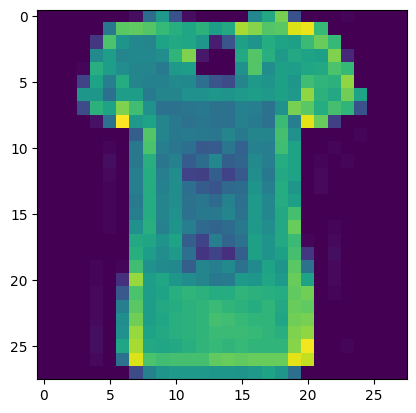

In [8]:
plt.imshow(train_data[444])

In [32]:
items = ["tshirt", "trouser", "pullover","dress", "coat", "sandal","shirt", "sneaker", "bag", "ankle boot"]

In [10]:
mnist_model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

mnist_model1.compile(loss= tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer="adam",
                     metrics="accuracy")
#mnist_model1.fit(train_data, train_labels, epochs = 100, validation_data=(test_data, test_labels))

In [11]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

mnist_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
mnist_model2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

history = mnist_model2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2273 - accuracy: 0.5447 - val_loss: 0.8855 - val_accuracy: 0.7213
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7796 - accuracy: 0.7492 - val_loss: 0.7479 - val_accuracy: 0.7516
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6802 - accuracy: 0.7708 - val_loss: 0.7194 - val_accuracy: 0.7487
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6253 - accuracy: 0.7841 - val_loss: 0.6304 - val_accuracy: 0.7870
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5989 - accuracy: 0.7901 - val_loss: 0.6367 - val_accuracy: 0.7733
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5825 - accuracy: 0.7946 - val_loss: 0.6085 - val_accuracy: 0.7844
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5735 - accuracy: 0.7971 - val_loss: 0.5927 - val_accuracy:

<Axes: >

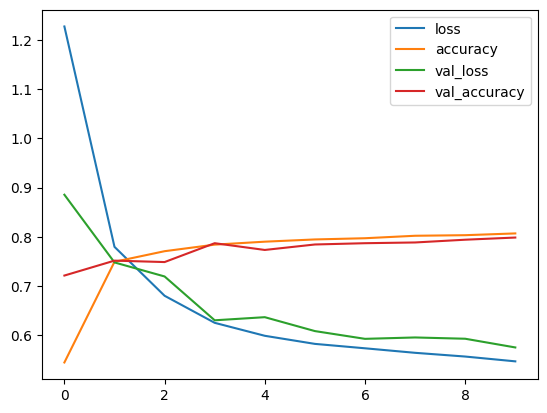

In [12]:
pd.DataFrame(history.history).plot()

In [17]:

mnist_model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
mnist_model3.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))
mnist_model3_history = mnist_model3.fit(train_data_norm, train_labels, epochs=25,callbacks=lr_scheduler, validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6451 - accuracy: 0.7735 - val_loss: 0.4869 - val_accuracy: 0.8286 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4470 - accuracy: 0.8433 - val_loss: 0.4744 - val_accuracy: 0.8316 - lr: 0.0011
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4209 - accuracy: 0.8522 - val_loss: 0.4583 - val_accuracy: 0.8376 - lr: 0.0013
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4113 - accuracy: 0.8544 - val_loss: 0.4370 - val_accuracy: 0.8474 - lr: 0.0014
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4002 - accuracy: 0.8564 - val_loss: 0.4612 - val_accuracy: 0.8297 - lr: 0.0016
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3912 - accuracy: 0.8598 - val_loss: 0.4301 - val_accuracy: 0.8452 - lr: 0.0018
Epoch 7/25
1875/1875 [==============================] - 4s

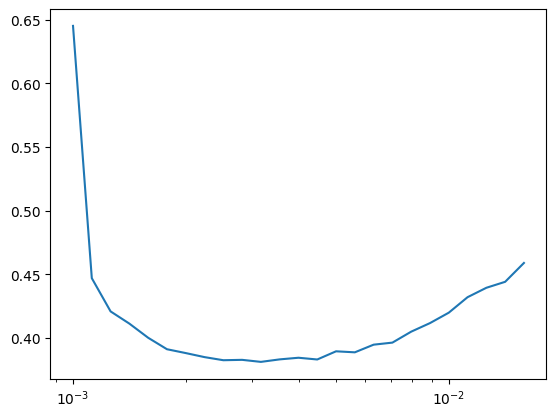

In [18]:
lrs = 1e-3 * (10 ** (tf.range(25)/20))
plt.semilogx(lrs, mnist_model3_history.history["loss"])

In [19]:

mnist_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
mnist_model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=["accuracy"])

history = mnist_model2.fit(train_data_norm, train_labels, epochs = 25, validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0836 - accuracy: 0.6204 - val_loss: 0.7865 - val_accuracy: 0.7303
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7089 - accuracy: 0.7557 - val_loss: 0.7023 - val_accuracy: 0.7526
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6504 - accuracy: 0.7730 - val_loss: 0.6799 - val_accuracy: 0.7617
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6094 - accuracy: 0.7859 - val_loss: 0.6215 - val_accuracy: 0.7843
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5688 - accuracy: 0.7997 - val_loss: 0.5859 - val_accuracy: 0.7957
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5426 - accuracy: 0.8081 - val_loss: 0.5651 - val_accuracy: 0.8060
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5284 - accuracy: 0.8128 - val_loss: 0.5618 - val_accuracy:

<Axes: >

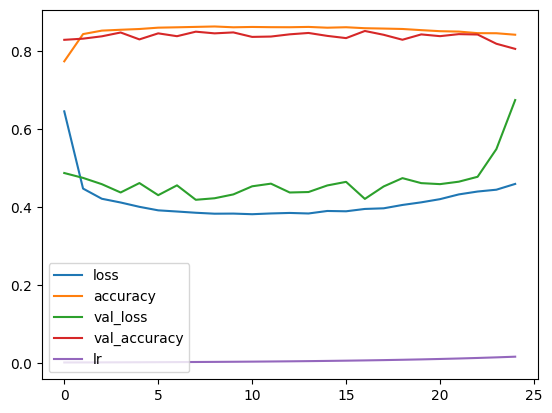

In [21]:
pd.DataFrame(mnist_model3_history.history).plot()

In [33]:
y_pred = mnist_model3.predict(test_data_norm)
tf.argmax(y_pred[0]), items[tf.argmax(y_pred[0])]

313/313 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'ankle boot')

In [34]:
predictions = y_pred.argmax(axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)


array([[747,   1,  30,  87,   4,  10,  49,   0,  72,   0],
       [  7, 950,   4,  33,   2,   1,   0,   0,   3,   0],
       [ 26,   0, 751,  15, 138,   2,  15,   0,  53,   0],
       [ 28,   8,  27, 868,  17,   1,  13,   0,  38,   0],
       [  0,   1, 126,  67, 721,   0,  40,   0,  45,   0],
       [  0,   0,   2,   0,   0, 931,   0,  32,   4,  31],
       [137,   2, 252,  57,  81,   5, 338,   1, 127,   0],
       [  0,   0,   0,   0,   0,  91,   0, 802,   1, 106],
       [  1,   0,   3,   6,   2,   4,   2,   2, 980,   0],
       [  0,   0,   0,   0,   0,  22,   0,  11,   1, 966]], dtype=int64)

In [41]:
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will label with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

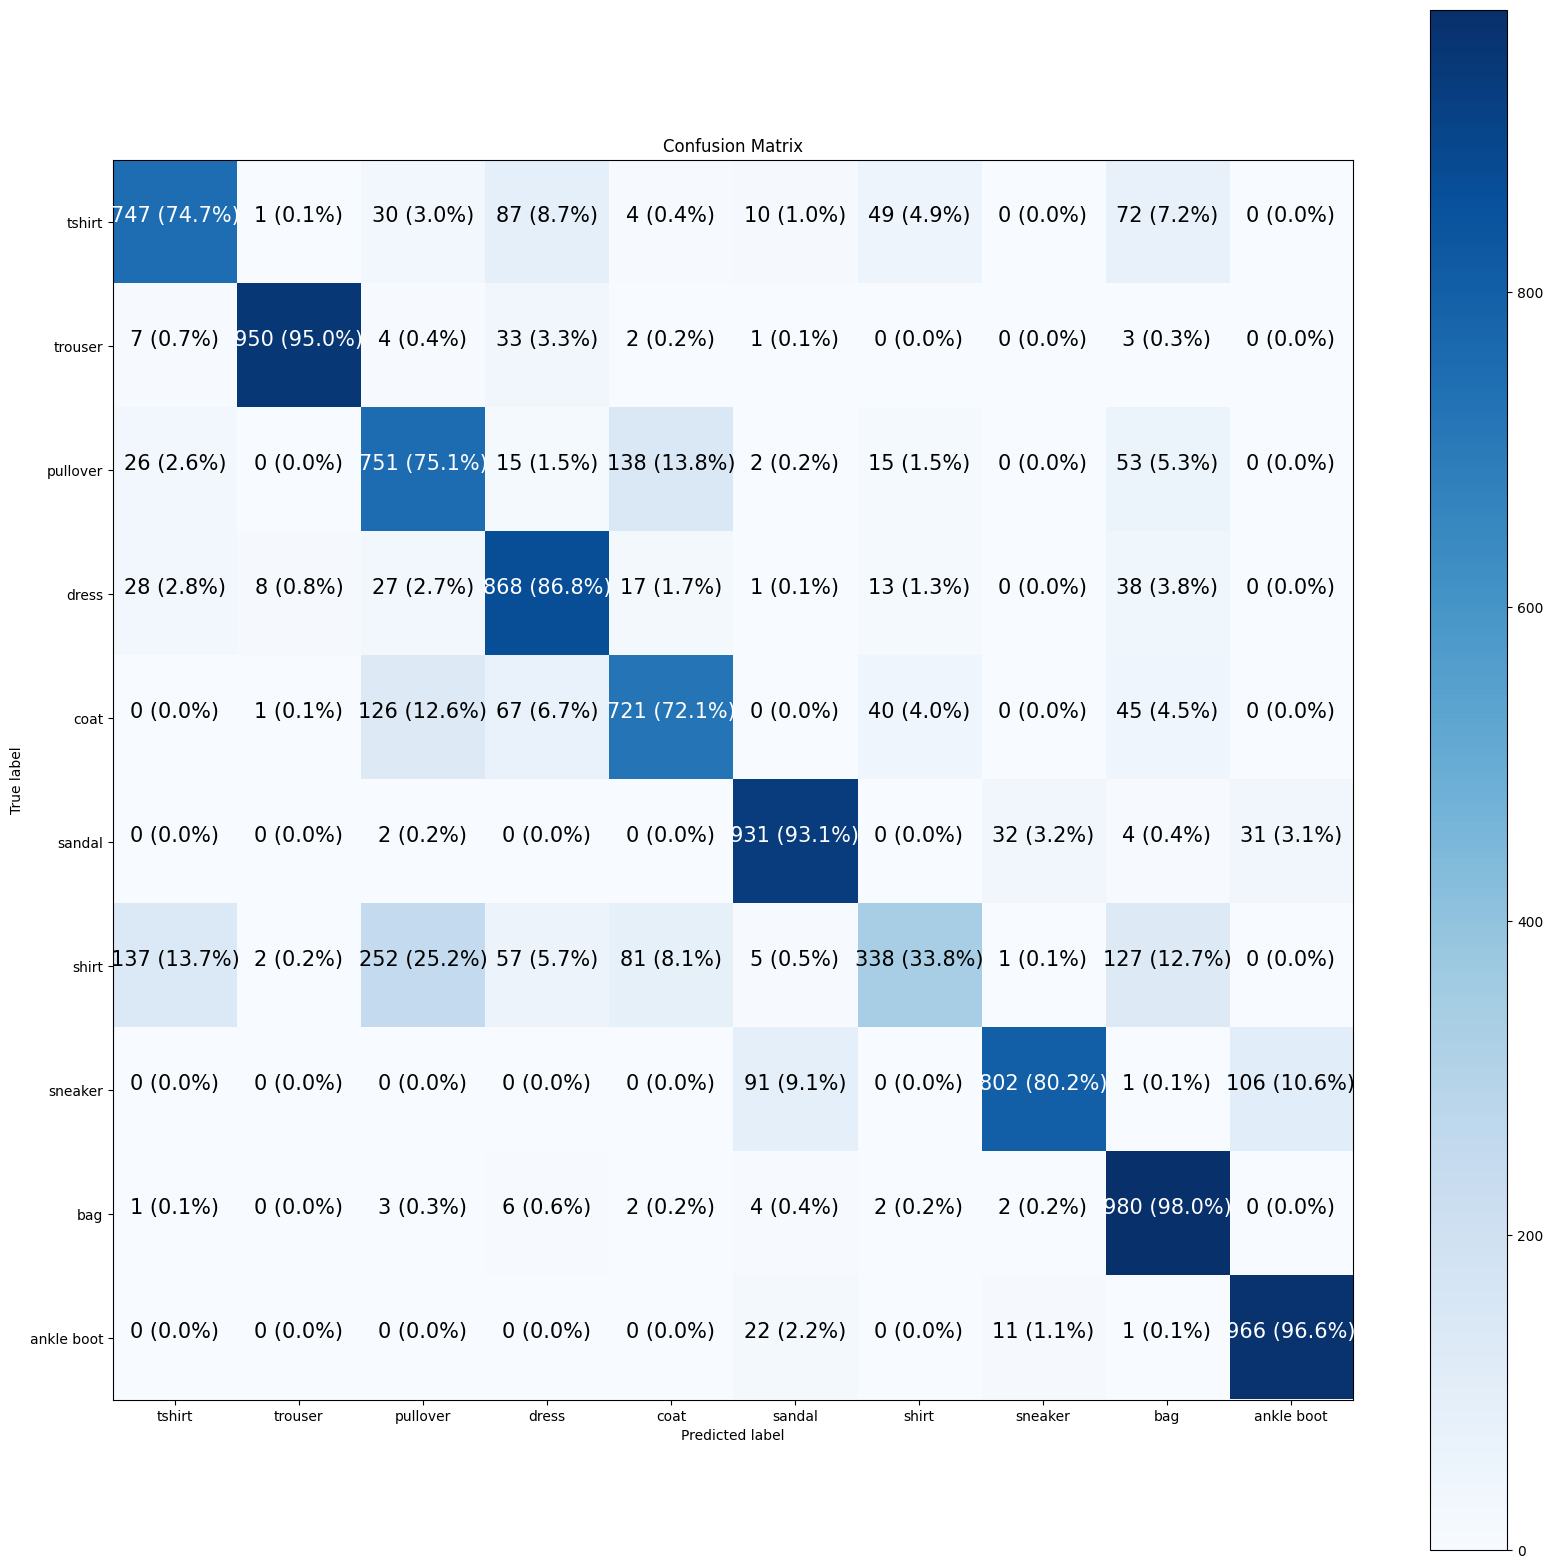

In [42]:
make_confusion_matrix(test_labels, predictions, items)

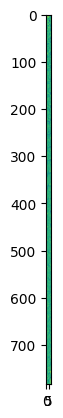

In [47]:
mnist_model3.layers[1].get_weights()[0]